## REI602M Machine Learning - Homework 3
### Due: Thursday 3.2.2019

**Objectives**: Logistic regression, k-Nearest neighbors, debugging machine learning algorithms. 

**Name**: Emil Gauti Friðriksson, **email: ** egf3@hi.is, **collaborators:** Alexander Guðjónsson

Please provide your solutions by filling in the appropriate cells in this notebook, creating new cells as needed. Hand in your solution on Gradescope, taking care to locate the appropriate page numbers in the PDF document. Make sure that you are familiar with the course rules on collaboration (encouraged) and copying (very, very, bad).

*Note*: Problems 1 and 2 are fairly straightforward but the running times are long. *Start early!*

1) [Classification of handwritten digits, 40 points] The MNIST database of handwritten digits set is a classic machine learning benchmark. It consists of 70,000 digitized images of handwritten digits, split into a training set with 60,000 examples and a test set with 10,000 examples. Each image is a grayscale 28x28 bitmap. In this problem you will evaluate the performance of a logistic regression classifier applied to the raw image data. In the beginning you should use a random subset of the training data with say 10K examples, and possibly the validation data as well. Once your code appears to be running correctly you should increase the amount of training (and validation) data.

![digits](mnist_0-9.png)

Download the dataset from `https://notendur.hi.is/steinng/kennsla/2019/ml/data/mnist.npz` (18 MB). The original 60,000 training set has been split into a "new" training set with 55,000 examples and a validation set with 5,000 examples to be used for model selection (tuning of hyper-parameters) in problem 2).

The 28x28 images have been stacked in 784-element vectors which serve as input to the training/test procedures. A pre-processing scaling step is not needed for this particular data set.

*Comments*: 
To visualize the raw images you can use: `matplotlib.pyplot.imshow(1-x_test[0].reshape(28,28),interpolation='none',cmap='gray') # x_test[0] is the first test example

A description of the MNIST data set can be found here: http://yann.lecun.com/exdb/mnist/

a) [10 points] Train a multi-class logistic regression classifier and evaluate its performance on the test set using the scikit-learn package (see v03_logreg.pynb on Piazza). Report the training and test set error rates.

*Comments*:
The `LogisticRegression` class handles multi-class problems via a one-vs-all scheme. This implementation actually performs regularized logistic regression (2-norm by default) with the level of regularization is controlled by a parameter called `C` but here we use the default setting (which happens to be close to optimal).

The function `LogisticRegression.score` returns the (mean) classifier accuracy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

data=np.load('mnist.npz')
X_train=data['x_train']
y_train=data['y_train']
X_val=data['x_val']
y_val=data['y_val']
X_test=data['x_test']
y_test=data['y_test']

logistR = LogisticRegression()
logistR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [2]:
print('Test accuracy: ',logistR.score(X_test,y_test))
y_pred = logistR.predict(X_test)
print('Test Error:     {0:1.4f} '.format(np.average(y_pred != y_test)))
print('Train accuracy:',round(logistR.score(X_train,y_train),4))
y_pred = logistR.predict(X_train)
print('Train Error:    {0:1.4f}'.format(np.average(y_pred != y_train)))

Test accuracy:  0.9198
Test Error:     0.0802 
Train accuracy: 0.9262
Train Error:    0.0738


b) [10 points] i) How does the test error in a) compare with the results reported on Yann LeCun's page (see above)? ii) Obtain a confusion matrix for the test set. Which classes are most often incorrectly classified? iii) Create a 5 x 5 figure showing examples of incorrectly classified images (label each image with the correct classification).

*Comments*: A *confusion matrix* is a n_class by n_class matrix where the element in row $i$ and column $j$ corresponds to the number of times class $i$ was classified as $j$. Diagonal elements thus correspond to correct classifications and off-diagonal elements to misclassifications. You can use the `sklearn.metrics.confusion_matrix` function to construct this matrix.

Use `matplotlib.pyplot.subplot` to create the 5 x 5 figure.

**(i)** The test error we find from using the LogisticRegression fitting on the test data is $E_{Test} =1-0.9198 = 0.0802 = 8.02\%$ and the error on using the same fit on the training data is: $E_{Train} = 1-0.9262 = 0.0738 = 7.38\%$. The test error rate that Yann LeCun reports for not preprocessed linear classifier(1-layer NN) is considerably higher than we find: $E_{\text{LeCun-Test}} = 12.0\% > 8.02\% = E_{Test}$

**(ii)** Confusion matrix:

In [1]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,logistR.predict(X_test))
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='bwr')
plt.title('Confusion matrix')
plt.xlabel('Raunverulegt gildi')
plt.ylabel('Metið gildi')
plt.colorbar()
n = cm.shape[0]
p = cm.shape[1]
for i in range(n):
    for j in range(p):       
        plt.annotate(str(cm[i,j]),xy=(i,j), 
                     horizontalalignment='center', verticalalignment='center')

NameError: name 'y_test' is not defined

Við sjáum að algengasti ruglingurinn er þegar talan $5$ er metin sem talan $3$. Það virðist einnig vera algengt að talan $2$ er metin sem talan $8$

**(iii)** a 5 x 5 figure showing examples of incorrectly classified images:

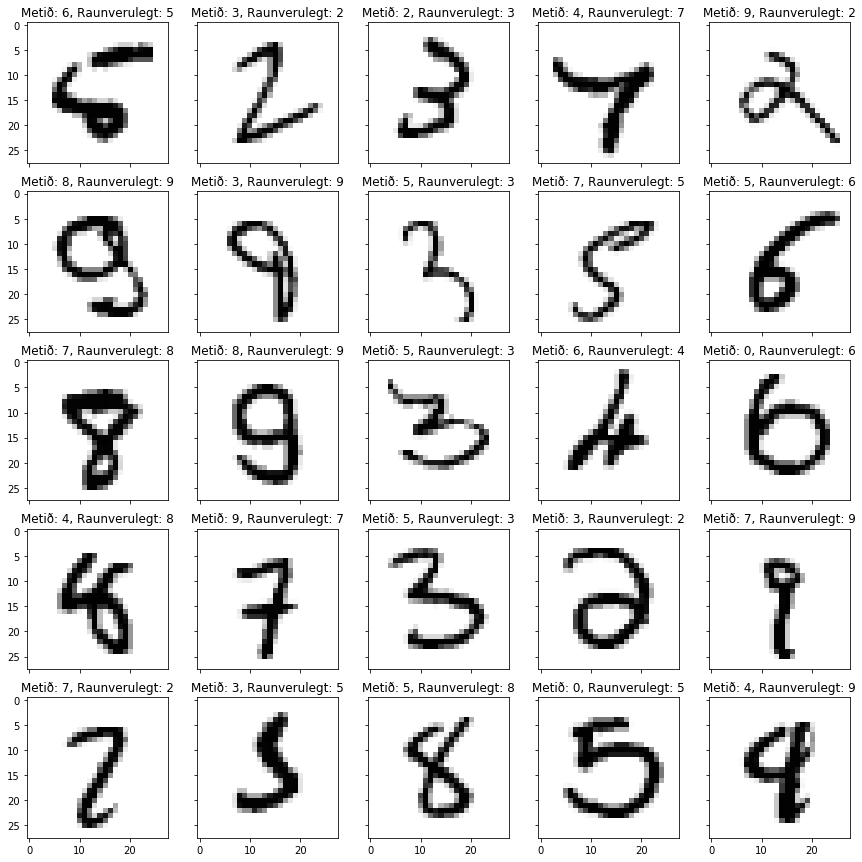

In [4]:
n = len(y_test)
wrong = [] 
predict = logistR.predict(X_test)
for i in range(n):
    if predict[i] != y_test[i]:
        wrong.append(i)

fig, ax = plt.subplots(5, 5, sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.set_figheight(15)
fig.set_figwidth(15)
index=0
for i in range(5):
    for j in range(5):        
        ax[i, j].imshow(1-X_test[wrong[index]].reshape(28,28),
                        interpolation='none',cmap='gray')
        ax[i, j].set_title('Metið: '+str(predict[wrong[index]])+
                           ', Raunverulegt: '+str(y_test[wrong[index]]))
        index = index+1




c) [20 points] Here you are to perform *feature engineering* with the goal of increasing classifier accuracy. Feature engineering is sometimes done by exploiting knowledge about the problem domain but here a generic but counter-intuitive strategy that sometimes works well is used. The new features are given by nonlinear functions of *random* linear combiniations of the original features and are added to the original feature set.

Let $q$ denote the number of variables to be added, e.g. $q=500$ or $q=1000$. For a 784-element vector $x$, the new (derived) variables are given by $\max{((Rx)_j,0)}),~j=1,\ldots,q$ where $R$ is a $q \times 784$ matrix with elements which are selected at random, $R_{ij}=\pm 1$. Fyrir each image in the training and test sets you add $q$ such elements. You then train a classifier using the augmented training set as in a) and evaluate its accuracy on the augmented test set.

*Comments*: $(Rx)_j$ denotes the $j$-th element of the matrix-vector product $Rx$.

You can use `np.random.randint` to create a random 0/1 vector which you then transform to $pm~1$ values. You can use `np.maximum` for the max-operation.

You create a separate $R$-matrix for each value of $q$ and use the same matrix for both the training and test sets.

You may want to use a stochastic gradient solver instead of the default solver used by `LogisticRegression.fit`. To do this use `solver=saga` when constructing the LogReg class object.

If you have a fast computer you might want to try $q=5,000$ and 10,000 as well. Start with subsets of the training and test sets and fairly small values of $q$.

In [69]:
q = 500
X_train_s = X_train[0:500,:]
X_test_s = X_test[0:50,:]
y_train_s = y_train[0:500]
y_test_s = y_test[0:50]
n = X_train_s.shape[0]
p = X_train_s.shape[1]
R = np.random.randint(2,size=(q,p))
R = 2*R-1 # smíðum R-fylkið með gildi pm1
X_train_c = np.zeros((n,p+q))
for i in range(n):
    Rx = R@X_train_s[i]
    c = np.copy(X_train_s[i])
    for j in range(q):
        c = np.append(c,np.maximum(Rx[j],0))
    X_train_c[i] = c
    
m = X_test_s.shape[0]
X_test_c = np.zeros((m,q+p))
for i in range(m):
    Rx = R@X_test_s[i]
    c = np.copy(X_test_s[i])
    for j in range(q):
        c = np.append(c,np.maximum(Rx[j],0))
    X_test_c[i] = c
    
LogistRc = LogisticRegression(solver = 'saga')
LogistRc.fit(X_train_c,y_train_s)





C:\Users\snati\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
print('Test accuracy: ',LogistRc.score(X_test_c,y_test_s))
y_pred = LogistRc.predict(X_test_c)
print('Test Error:     {0:1.4f} '.format(np.average(y_pred != y_test_s)))
print('Train accuracy:',round(LogistRc.score(X_train_c,y_train_s),4))
y_pred = LogistRc.predict(X_train_c)
print('Train Error:    {0:1.4f}'.format(np.average(y_pred != y_train_s)))

Test accuracy:  0.92
Test Error:     0.0800 
Train accuracy: 1.0
Train Error:    0.0000


2) [Nearest neighbor classifiers, 30 points] In this exercise you train a $k$-NN classifier on the MNIST data set, use the validation set to select an optimal value of $k$ in the range [1,12] and classify the test set.

*Comments*: Use the `neighbors.KNeighborsClassifier` implementation in scikit-learn with `n_jobs=-1` to utilize multiple CPU cores.

The results reported on Yann LeCun's page suggest that the $L_3$ norm gives slightly better results than the Euclidean ($L_2$) norm which is the default distance metric in `KNeighborsClassifier`. The $L_p$-norm of a vector $x \in R^n$ is defined as $(|x_1|^p + \ldots |x_n|^p)^{(1/p)}$.

a) [10 points] Create a plot showing the training and validation accuracy as a function of $k$. Which $k$ value is optimal?

*Comment*:  You should probably start by using a random subset of the training data (and possibly the validation data) since running times are quite long.

Error 1 : 0.04820000000000002
Error 2 : 0.05800000000000005
Error 3 : 0.0494
Error 4 : 0.0494
Error 5 : 0.0484
Error 6 : 0.04820000000000002
Error 7 : 0.04920000000000002
Error 8 : 0.050000000000000044
Error 9 : 0.0514
Error 10 : 0.052200000000000024
Error 11 : 0.052000000000000046
Error 12 : 0.05159999999999998


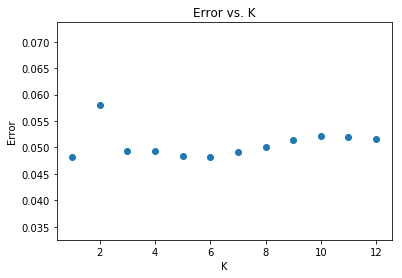

In [58]:
from sklearn.neighbors import KNeighborsClassifier
#fækkum gögnunum okkar
X_train_s = X_train[0:5000,:]
X_test_s = X_test[0:500,:]
y_train_s = y_train[0:5000]
y_test_s = y_test[0:500]
K = np.arange(1,13)
error = np.zeros(len(K))




for i in range(len(K)):
    knn = KNeighborsClassifier(n_neighbors = K[i],p=3,n_jobs=-1)
    knn.fit(X_train_s,y_train_s)
    error[i] = 1-knn.score(X_val,y_val)
    print('Error',i+1,':',error[i])
    


#plottum niðurstöðurnar
plt.scatter(K,error)
plt.ylabel('Error')
plt.xlabel('K')
plt.title('Error vs. K')
plt.show()

b) [10 points] Select an appropriate value of $k$ based on a) and classify the test set and report the test set accuracy.

In [61]:
from sklearn.neighbors import KNeighborsClassifier
k_0 = 6 # skv a) lið er k_0 = 1 eða k_0 = 6
X_train_s = X_train[0:5000,:]
X_test_s = X_test[0:500,:]
y_train_s = y_train[0:5000]
y_test_s = y_test[0:500]

knn = KNeighborsClassifier(n_neighbors = k_0,p=3,n_jobs = -1)
knn.fit(X_train_s,y_train_s)

error = 1-knn.score(X_test,y_test)
print('Test set accuracy:',1-error)
print('Test set Error:',error)

Test set accuracy: 0.9339
Test set Error: 0.06610000000000005


c) [10 points] Do the $k$-NN and logistic regression classifier make similar mistakes? Comment briefly on using a $k$-NN classifier vs logistic regression for the MNIST data set.

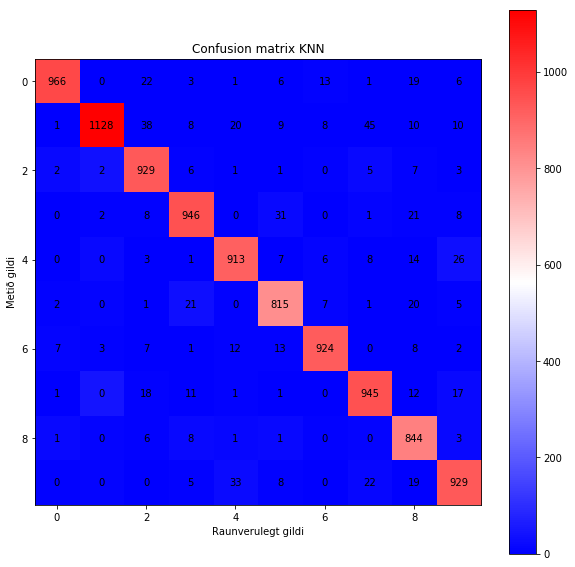

In [62]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='bwr')
plt.title('Confusion matrix KNN')
plt.xlabel('Raunverulegt gildi')
plt.ylabel('Metið gildi')
plt.colorbar()
n = cm.shape[0]
p = cm.shape[1]
for i in range(n):
    for j in range(p):       
        plt.annotate(str(cm[i,j]),xy=(i,j), 
                     horizontalalignment='center', verticalalignment='center')

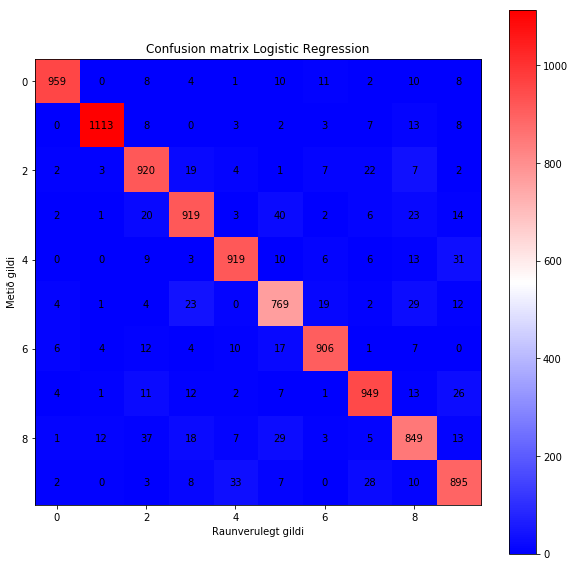

In [63]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,logistR.predict(X_test))
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='bwr')
plt.title('Confusion matrix Logistic Regression')
plt.xlabel('Raunverulegt gildi')
plt.ylabel('Metið gildi')
plt.colorbar()
n = cm.shape[0]
p = cm.shape[1]
for i in range(n):
    for j in range(p):       
        plt.annotate(str(cm[i,j]),xy=(i,j),
                     horizontalalignment='center', verticalalignment='center')

In [64]:
print('Logist Regression Test accuracy: ',logistR.score(X_test,y_test))
y_pred = logistR.predict(X_test)
print('Logist Regression Test Error:     
      {0:1.4f} '.format(np.average(y_pred != y_test)))
print('KNN Test set accuracy:',1-error)
print('KNN Test set Error:',error)

Logist Regression Test accuracy:  0.9198
Logist Regression Test Error:     0.0802 
KNN Test set accuracy: 0.9339
KNN Test set Error: 0.06610000000000005


Sjáum að Confusion matrix fyrir KNN er frábrugðið confusion matrix fyrir Logistic regression. En einnig jafnvel þótt við notuðum einungis $\approx 10\%$ af X_train í KNN þá erum við að fá meira accuracy þar þegar við notum modelið á öll test-gögnin. Ég myndi því velja KNN umfram Logistic regression þó svo að keyrslutími sé umtalsvert lengri.

3) [Debugging machine learning algorithms, 30 points] In this problem (taken from Andrew Ng's machine learning course at Stanford), we will be delving deeper into the workings of logistic regression. The goal of this problem is to help you develop your skills debugging machine learning algorithms (which can be very different from debugging software in general).

Recall that logistic regression fits a model on the form
$$
f_\theta(x) = g(\theta^T x) = \frac{1}{1+\exp(-\theta^T x)}
$$
by maximizing the corresponding log-likelihood function $l(\theta)$.

The file `lr_debug.py` contains an implementation of a batch gradient descent algorithm for
logistic regression. The algorithm continues until the change in $\theta$ between
iterations becomes very small (less than $10^{-15}$). Two labeled datasets hw3_data_a.txt, and hw3_data_b.txt (datasets A and B) are also provided. Please do not modify the code for the logistic regression training algorithm for this problem  (other than for debugging purposes). First, run the given logistic regression code to train two different models on A and B.

a) [5 points] What is the most notable difference in training the logistic regression model
on datasets A and B?

In [68]:
import lr_debug
lr_debug.main()


==== Training model on data set A ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Converged in 30368 iterations

==== Training model on data set B ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations


KeyboardInterrupt: 

a : Converged in 30368 iterations <br />
b : Does not converge.

b) [10 points] Investigate why the training procedure behaves unexpectedly on dataset
B, but not on A. Provide hard evidence (in the form of math, code, plots, etc.) to
corroborate your hypothesis for the misbehavior. Remember, you should address why
your explanation does not apply to A. *Hint*: The issue is not a numerical rounding or over/underflow error.

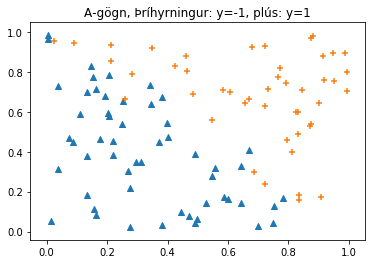

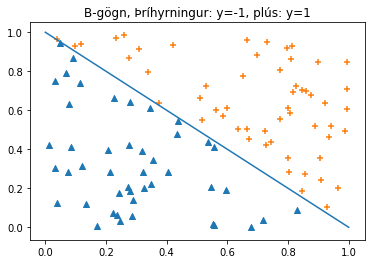

In [66]:
ya, Xa1,Xa2 = np.loadtxt('hw3_data_a.txt',delimiter=' ', unpack=True)
yb, Xb1,Xb2 = np.loadtxt('hw3_data_b.txt',delimiter=' ', unpack=True)

Xa1_m = Xa1[np.where(ya==-1)]
Xa2_m = Xa2[np.where(ya==-1)]
Xa1_p = Xa1[np.where(ya==1)]
Xa2_p = Xa2[np.where(ya==1)]

Xb1_m = Xb1[np.where(yb==-1)]
Xb2_m = Xb2[np.where(yb==-1)]
Xb1_p = Xb1[np.where(yb==1)]
Xb2_p = Xb2[np.where(yb==1)]

plt.title('A-gögn, Þríhyrningur: y=-1, plús: y=1')
plt.scatter(Xa1_m,Xa2_m,marker='^')
plt.scatter(Xa1_p,Xa2_p,marker='+')
plt.show()

plt.title('B-gögn, Þríhyrningur: y=-1, plús: y=1')
plt.scatter(Xb1_m,Xb2_m,marker='^')
plt.scatter(Xb1_p,Xb2_p,marker='+')
plt.plot([1,0],[0,1])
plt.show()


Við sjáum að gögnin eru ekki linearly separable fyrir A-gögnin en þegar kemur að B-gögnunum þá sjáum við að hægt er að teikna línu sem aðskilur þríhyrninga og plúsa. Þessi útfærsla af Logistic Regression úr lr_debug.py hefur ekki regularization og því stefnir $\theta$ í óendanlegt.

c) [15 points] For each of these possible modifications, state whether or not it would lead
to the provided training algorithm converging on datasets such as B. Justify your
answers.

i. Using a different constant learning rate.

ii. Decreasing the learning rate over time (e.g. scaling the initial learning rate by $1/t^2$, where $t$ is the number of gradient descent iterations thus far).

iii. Linear scaling of the input features.

iv. Adding zero-mean normally distributed noise to the training data or labels.

v. Adding a regularization term on the form $||\theta||_2^2$ to the likelihood function.

**(i)** Upphaflega gildið á learning rate er $10$ sem er nokkuð hátt gildi. Vandamálið er þó ekki það að learning rate sé að gera það að verkum að við séum að 'overshoota' lágmarkið á fallinu. Það getum við ályktað vegna þess að fallið verkað á gagnasafnið A er jafn hratt að ná samleitni þó svo að learning rate er 10, 1 eða 0.00000001. Við ályktum því að breyting á constant learning rate hafi engin áhrif.<br />


**(ii)** Þetta ætti að draga úr áhættu þess að overshoota gögnin en vandamál algorithmans á gagnasafn B er ekki það að lágmarkið finnist ekki vegna 'overshooting'. Við drögum þá ályktunina að þetta komi ekki að gagni. <br />

**(iii)** Það er satt að línuleg skölun á gögnunum lætur Gradient Descent keyra miklu hraðar. Gagnasafnið B er þó skalað og samt hegðar forritið sér undarlega.<br />

**(iv)** Þetta gæti komið að gagni því það sem við viljum gera er að hliðra gögnunum á þann hátt að þau séu ekki lengur linearly seperatable.<br />

**(v)** Þetta væri góð lausn á þessu vandamáli okkar. Þetta myndi koma í veg fyrir að $\theta \rightarrow \infty$ og refsar fyrir of stór gildi á $\theta$